<a href="https://colab.research.google.com/github/Flaviaestat/Phyton/blob/master/Radix_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Case: German Credit data

## Preprocessing

Necessary imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Loading data

In [ ]:
german_data = pd.read_csv('german.data', sep = ' ', header = None)

setting columns names

In [ ]:
german_data.columns = ['status_of_existing_checking_account', 'duration_in_month', 'credit_history'
, 'purpose_car', 'credit_amount', 'savings_account', 'present_employment_since', 'installment_rate_disposable_income'
, 'personal_status_and_sex', 'other_debtors', 'present_residence_since', 'property', 'age_in_years', 'other_installment_plans'
, 'housing', 'number_existing_credits_bank', 'job', 'number_people_liable', 'telephone', 'foreign_worker', 'target']

Visualize data

In [ ]:
german_data.head()

,status_of_existing_checking_account,duration_in_month,credit_history,purpose_car,credit_amount,savings_account,present_employment_since,installment_rate_disposable_income,personal_status_and_sex,other_debtors,present_residence_since,property,age_in_years,other_installment_plans,housing,number_existing_credits_bank,job,number_people_liable,telephone,foreign_worker,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


Since categorical data is coded we have to replace accordingly to data dictionary

In [ ]:
german_data.replace('A11','< 0 DM', inplace=True)
german_data.replace('A12','>= 0 to 200 DM', inplace=True)
german_data.replace('A13','>= 2000 DM / salary assignments for at least 1 year', inplace=True)
german_data.replace('A14','no checking account', inplace=True)
german_data.replace('A30','no credits taken/all credits paid back duly', inplace=True)
german_data.replace('A31','all credits at this bank paid back duly', inplace=True)
german_data.replace('A32','existing credits paid back duly till now', inplace=True)
german_data.replace('A33','delay in paying off in the past', inplace=True)
german_data.replace('A34','critical account/other credits existing (not at this bank)', inplace=True)
german_data.replace('A40','car new', inplace=True)
german_data.replace('A41','car used', inplace=True)
german_data.replace('A42', 'furniture/equipment', inplace=True)
german_data.replace('A43', 'radio/television', inplace=True)
german_data.replace('A44', 'domestic appliances', inplace=True)
german_data.replace('A45', 'repairs', inplace=True)
german_data.replace('A46', 'education', inplace=True)
german_data.replace('A47', '(vacation - does not exist?)', inplace=True)
german_data.replace('A48', 'retraining', inplace=True)
german_data.replace('A49', 'business', inplace=True)
german_data.replace('A410', 'others', inplace=True)
german_data.replace('A61', '< 100 DM', inplace=True)
german_data.replace('A62', '100 <= ... <  500 DM', inplace=True)
german_data.replace('A63', '500 <= ... < 1000 DM', inplace=True)
german_data.replace('A64', '.. >= 1000 DM', inplace=True)
german_data.replace('A65', 'unknown/ no savings account', inplace=True)
german_data.replace('A71', 'unemployed', inplace=True)
german_data.replace('A72', '... < 1 year', inplace=True)
german_data.replace('A73', '1  <= ... < 4 years' , inplace=True)
german_data.replace('A74', '4  <= ... < 7 years', inplace=True)
german_data.replace('A75', '.. >= 7 years', inplace=True)
german_data.replace('A91', 'male: divorced/separated', inplace=True)
german_data.replace('A92', 'female: divorced/separated/married', inplace=True)
german_data.replace('A93', 'male: single', inplace=True)
german_data.replace('A94', 'male: married/widowed', inplace=True)
german_data.replace('A95', 'female: single', inplace=True)
german_data.replace('A101', 'none', inplace=True)
german_data.replace('A102', 'co-applicant', inplace=True)
german_data.replace('A103', 'guarantor', inplace=True)
german_data.replace('A121', 'real estate', inplace=True)
german_data.replace('A122', 'building society savings agreement/life insurance', inplace=True)
german_data.replace('A123',  'car or other', inplace=True)
german_data.replace('A124', 'unknown / no property', inplace=True)
german_data.replace('A141', 'bank', inplace=True)
german_data.replace('A142', 'stores', inplace=True)
german_data.replace('A143', 'none', inplace=True)
german_data.replace('A151', 'rent', inplace=True)
german_data.replace('A152', 'own', inplace=True)
german_data.replace('A153', 'for free', inplace=True)
german_data.replace('A171', 'unemployed/ unskilled  - non-resident', inplace=True)
german_data.replace('A172', 'unskilled - resident', inplace=True)
german_data.replace('A173', 'skilled employee / official', inplace=True)
german_data.replace('A174', 'management/ self-employed/highly qualified employee/ officer', inplace=True)
german_data.replace('A191', 'none', inplace=True)
german_data.replace('A192', 'yes, registered under the customers name', inplace=True)
german_data.replace('A201', 'yes', inplace=True)
german_data.replace('A202', 'no', inplace=True)



Checking codification

In [ ]:
german_data.head()


,status_of_existing_checking_account,duration_in_month,credit_history,purpose_car,credit_amount,savings_account,present_employment_since,installment_rate_disposable_income,personal_status_and_sex,other_debtors,present_residence_since,property,age_in_years,other_installment_plans,housing,number_existing_credits_bank,job,number_people_liable,telephone,foreign_worker,target
0,< 0 DM,6,critical account/other credits existing (not a...,radio/television,1169,unknown/ no savings account,.. >= 7 years,4,male: single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1
1,>= 0 to 200 DM,48,existing credits paid back duly till now,radio/television,5951,< 100 DM,1 <= ... < 4 years,2,female: divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,2
2,no checking account,12,critical account/other credits existing (not a...,education,2096,< 100 DM,4 <= ... < 7 years,2,male: single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,1
3,< 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,< 100 DM,4 <= ... < 7 years,2,male: single,guarantor,4,building society savings agreement/life insurance,45,none,for free,1,skilled employee / official,2,none,yes,1
4,< 0 DM,24,delay in paying off in the past,car new,4870,< 100 DM,1 <= ... < 4 years,3,male: single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,2


Numerical features analisys


In [ ]:
german_data.describe()

,duration_in_month,credit_amount,installment_rate_disposable_income,present_residence_since,age_in_years,number_existing_credits_bank,number_people_liable,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


Coding target variable

In [ ]:
#Code 1 = Good / 2 = Bad
#We want to predict probability of being Bad
german_data['target'].replace([1,2],[0,1],inplace=True)


## Exploratory data analysis

Check if the target data is balanced - Credit: Good or Bad

In [ ]:
german_data['target'].value_counts()

0    700
1    300
Name: target, dtype: int64

Checking mean of predictors by target variable

In [ ]:
avg_num = german_data.groupby('target', as_index=False).mean()
avg_num.head()

,target,duration_in_month,credit_amount,installment_rate_disposable_income,present_residence_since,age_in_years,number_existing_credits_bank,number_people_liable,rand,rank
0,0,19.207143,2985.457143,2.920000,2.842857,36.224286,1.424286,1.155714,0.488489,502.161429
1,1,24.860000,3938.126667,3.096667,2.850000,33.963333,1.366667,1.153333,0.483893,496.623333


Graphs with information above

Duration in month

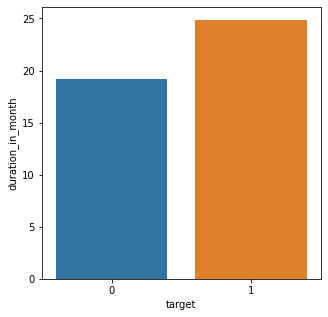

In [ ]:
a4_dims = (5, 5)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(ax=ax, y = "duration_in_month", x = "target", data = avg_num)


credit_amount

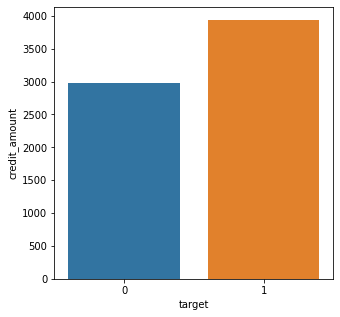

In [ ]:
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(ax=ax, y = "credit_amount", x = "target", data = avg_num)

installment_rate_disposable_income

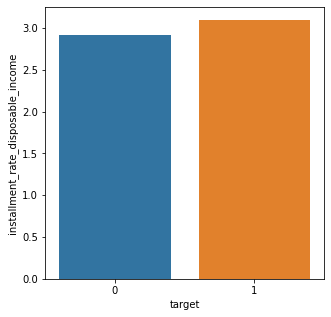

In [ ]:
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(ax=ax, y = "installment_rate_disposable_income", x = "target", data = avg_num)

present_residence_since

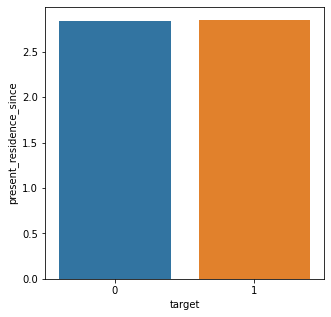

In [ ]:
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(ax=ax, y = "present_residence_since", x = "target", data = avg_num)

age_in_years		

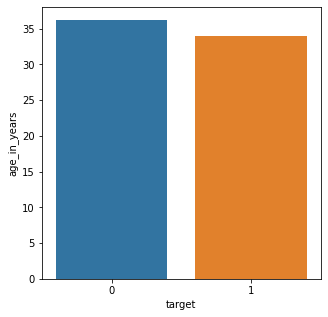

In [ ]:
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(ax=ax, y = "age_in_years", x = "target", data = avg_num)

number_existing_credits_bank

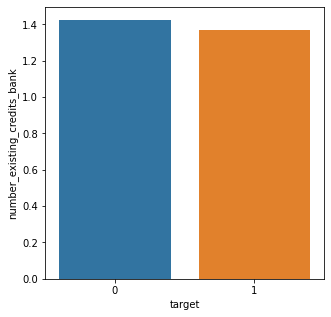

In [ ]:
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(ax=ax, y = "number_existing_credits_bank", x = "target", data = avg_num)

number_people_liable

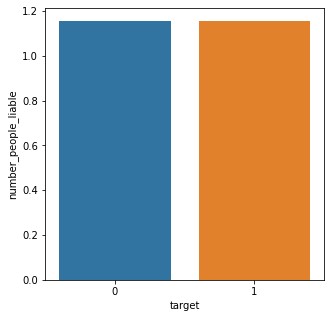

In [ ]:
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(ax=ax, y = "number_people_liable", x = "target", data = avg_num)

The analysis above shows that few numerical features are good predictors. However this will be tested more extensively in the modelling (coefficients and p-values analysis)

Good predictors in initial analysis: duration_in_month, credit_amount, age_in_years, number_existing_credits_bank

## Split train and test sample

Obs: Not using split_train_test from sci kit learn to allow ballance data more easily

Instead I'll create a random sampling column and ranks to split the data

In [ ]:
german_data['rand'] = np.random.rand(len(german_data))
german_data['rank'] = german_data['rand'].rank(pct=False)
german_data_test = german_data[german_data['rank'] <= 200]
german_data_train = german_data[german_data['rank'] > 200]


Checking sizes train and test data

In [ ]:
len(german_data_test)

200

In [ ]:
len(german_data_train)

800

In [ ]:
german_data_train['target'].value_counts()

0    559
1    241
Name: target, dtype: int64

Count to balance data using undersampling

In [ ]:
samplek = min(german_data_train['target'].value_counts())
print(samplek)

241


## Balancing train data

In [ ]:
def sampling_k_elements(group, k=samplek):
    if len(group) < k:
        return group
    return group.sample(k)

german_data_train_balanced = german_data_train.groupby('target').apply(sampling_k_elements).reset_index(drop=True)
german_data_train_balanced['target'].value_counts()

1    241
0    241
Name: target, dtype: int64

In [ ]:
german_data_train_balanced.columns

Index(['status_of_existing_checking_account', 'duration_in_month',
       'credit_history', 'purpose_car', 'credit_amount', 'savings_account',
       'present_employment_since', 'installment_rate_disposable_income',
       'personal_status_and_sex', 'other_debtors', 'present_residence_since',
       'property', 'age_in_years', 'other_installment_plans', 'housing',
       'number_existing_credits_bank', 'job', 'number_people_liable',
       'telephone', 'foreign_worker', 'target', 'rand', 'rank'],
      dtype='object')

In [ ]:
german_data_train_balanced.head(2)

,status_of_existing_checking_account,duration_in_month,credit_history,purpose_car,credit_amount,savings_account,present_employment_since,installment_rate_disposable_income,personal_status_and_sex,other_debtors,present_residence_since,property,age_in_years,other_installment_plans,housing,number_existing_credits_bank,job,number_people_liable,telephone,foreign_worker,target,rand,rank
0,no checking account,21,existing credits paid back duly till now,car used,5248,unknown/ no savings account,1 <= ... < 4 years,1,male: single,none,3,car or other,26,none,own,1,skilled employee / official,1,none,yes,0,0.529678,555.0
1,>= 0 to 200 DM,10,existing credits paid back duly till now,furniture/equipment,1521,< 100 DM,1 <= ... < 4 years,4,male: divorced/separated,none,2,car or other,31,none,own,1,unskilled - resident,1,none,yes,0,0.443932,461.0


## Model 

Formula with all variables

In [ ]:
formula_text = ("""
    target ~ 
    C(status_of_existing_checking_account)
    + duration_in_month
    + C(credit_history)
    + C(purpose_car)
    + credit_amount
    + C(savings_account)
    + C(present_employment_since)
    + installment_rate_disposable_income	
    + C(personal_status_and_sex)
    + C(other_debtors)
    + present_residence_since
    + C(property)
    + age_in_years
    + C(other_installment_plans)
    + C(housing)
    + number_existing_credits_bank	
    + C(job)
    + number_people_liable
    + C(telephone)
    + C(foreign_worker)
    """)

Logistic Regression Model - stats model offers extensive summary

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

logit_model = smf.logit(formula = str(formula_text), data = german_data_train_balanced).fit()
print(logit_model.summary2())

Optimization terminated successfully.
         Current function value: 0.470254
         Iterations 7
                                                               Results: Logit
Model:                                        Logit                                     Pseudo R-squared:                          0.322     
Dependent Variable:                           target                                    AIC:                                       551.3253  
Date:                                         2020-08-16 21:03                          BIC:                                       756.0446  
No. Observations:                             482                                       Log-Likelihood:                            -226.66   
Df Model:                                     48                                        LL-Null:                                   -334.10   
Df Residuals:                                 433                                       LLR p-value:          

Considerations: Overall prediction is not good based in Pseudo R-squared. However we have to measure accuracy in test data, so I'll create a confusion matrix

Graph with coefficients

In [ ]:
err_series = logit_model.params - logit_model.conf_int()[0]

coef_df = pd.DataFrame({'coef': logit_model.params[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })

Text(0.5, 0, '')

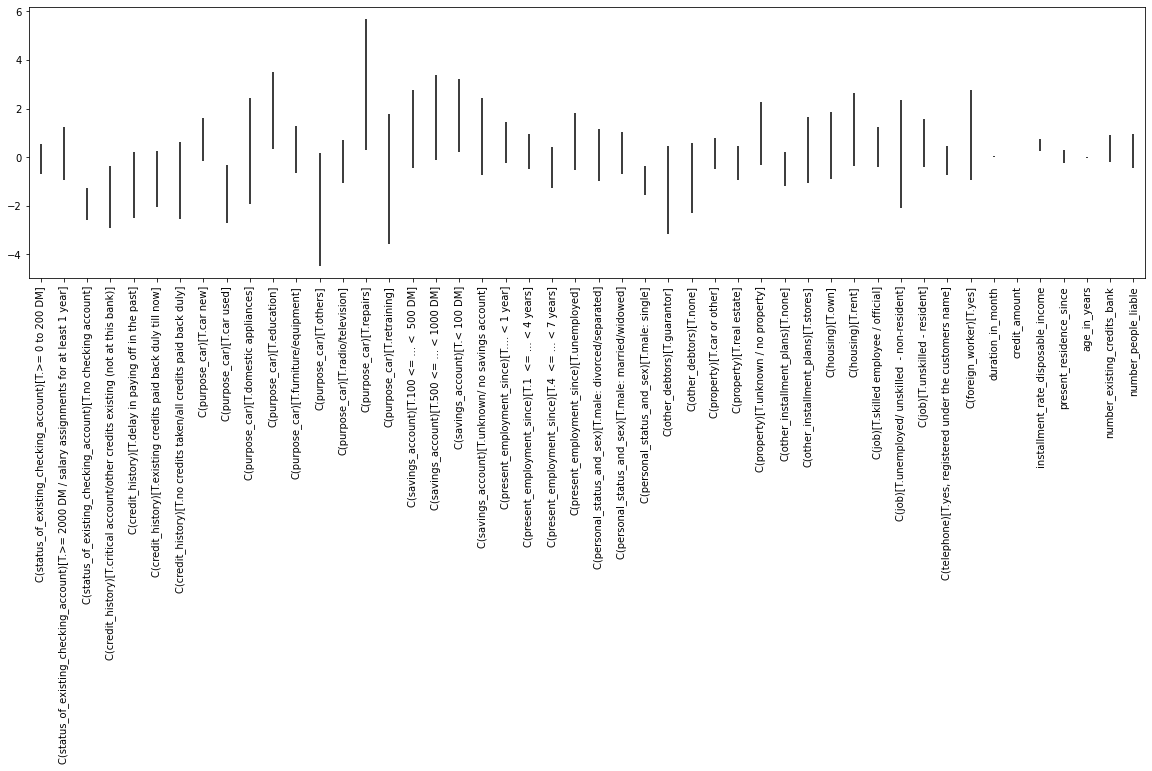

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')

Predicting in test data to evalutation

In [ ]:
prediction_scores = logit_model.predict(german_data_test)

In [ ]:
german_data_test['prediction_scores'] = prediction_scores
german_data_test[['target','prediction_scores']].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,target,prediction_scores
0,0,0.086267
4,1,0.889169
12,0,0.274926
17,0,0.852564
31,0,0.722807


Testing confusion matrix with several thresholds

In [ ]:
tresholds = [0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65]

for i in tresholds:
  def prediction(x):
    if x >= i:
      return 1
    else:
      return 0

  german_data_test['prediction'] = german_data_test['prediction_scores'].apply(prediction)
  confusion_matrix = pd.crosstab(german_data_test['target'], german_data_test['prediction'])
  predicted = confusion_matrix
  tot_predict =  confusion_matrix.iloc[0,1] + confusion_matrix.iloc[1,1]
  accuracy = (confusion_matrix.iloc[0,0] + confusion_matrix.iloc[1,1]) / len(german_data_test)
  precision =  confusion_matrix.iloc[1,1] / (confusion_matrix.iloc[0,1] + confusion_matrix.iloc[1,1])
  recall =  confusion_matrix.iloc[1,1] / (confusion_matrix.iloc[1,0] + confusion_matrix.iloc[1,1])
  F1 = (2 * precision * recall) / (precision + recall) #between 0 and 1 (better)
  print('Treshold: ' + str(i))
  print('accuracy: '  + str(accuracy))
  print('precision: ' + str(precision))
  print('recall: ' + str(recall))
  print('F1: ' + str(F1), end = '\n')
  print('________________')

Treshold: 0.3
accuracy: 0.635
precision: 0.43859649122807015
recall: 0.847457627118644
F1: 0.5780346820809248
________________
Treshold: 0.35
accuracy: 0.655
precision: 0.4537037037037037
recall: 0.8305084745762712
F1: 0.5868263473053892
________________
Treshold: 0.4
accuracy: 0.67
precision: 0.46601941747572817
recall: 0.8135593220338984
F1: 0.5925925925925927
________________
Treshold: 0.45
accuracy: 0.68
precision: 0.47368421052631576
recall: 0.7627118644067796
F1: 0.5844155844155844
________________
Treshold: 0.5
accuracy: 0.67
precision: 0.4606741573033708
recall: 0.6949152542372882
F1: 0.5540540540540542
________________
Treshold: 0.55
accuracy: 0.705
precision: 0.5
recall: 0.6779661016949152
F1: 0.5755395683453237
________________
Treshold: 0.6
accuracy: 0.725
precision: 0.5277777777777778
recall: 0.6440677966101694
F1: 0.5801526717557252
________________
Treshold: 0.65
accuracy: 0.72
precision: 0.5223880597014925
recall: 0.5932203389830508
F1: 0.5555555555555555
______________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


## Conclusions

Overall, the score treshold that shows best performance based on F1 is 0.45 (F1 = 59%). Considering accuracy as metric we should apply 0.65 (72% accuracy) as treshold.


However, since they estimate that incorrectly identifying a bad customer as good, is 5 times worse than incorrectly classifying a good customer as bad, we need a **high capture rate of bad customers**, wich is recall.

Based on recall, the best threshold for the model would be 30%. That is, we will classify as potentially bad customer every one with score higher than 0.3.  With this treshold these are the metrics for this model:

* accuracy: 0.635
* precision: 0.44
* recall: 0.845
* F1: 0.578
